In [1]:
import pandas as pa
import numpy as np
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
sd=pa.read_csv("E:\\ebooks CSE\\flight.csv")

In [3]:
#sd

In [4]:
sd.isnull().sum()

Year                   0
Month                  0
Day                    0
DayOfWeek              0
Flight_Date            0
UniqueCarrier          0
Tai_lNum               0
FlightNum              0
Origin_Airport         0
Origin_City_Name       0
Origin_State           0
Scheduled_Departure    0
Departure_Time         0
Dep_Delay              0
DepDel15               0
Dep_Delay_Groups       0
Scheduled_Arrival      0
Arrival_Time           0
Arrival_Delay          0
Arr_Delay_Minutes      0
Arr_Del_morethan15     0
Cancelled              0
Diverted               0
Distance               0
DistanceGroup          0
Carrier_Delay          0
WeatherDelay           0
NAS_Delay              0
Security_Delay         0
Late_Aircraft_Delay    0
Top_Carriers           0
Top_Origin             0
DEPTIME_GROUP1         0
DEPTIME_GROUP2         0
DEPTIME_GROUP3         0
dtype: int64

In [5]:
sd.shape

(4821, 35)

In [6]:
#dummies korte hobe 6,8,9,10

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
x6=sd.iloc[:,6]
x8=sd.iloc[:,8]
x9=sd.iloc[:,9]
x10=sd.iloc[:,10]

In [9]:
#x6

In [10]:
f6=LabelEncoder().fit_transform(x6)
f8=LabelEncoder().fit_transform(x8)
f9=LabelEncoder().fit_transform(x9)
f10=LabelEncoder().fit_transform(x10)

In [11]:
sd['x6']=f6
sd['x8']=f8
sd['x9']=f9
sd['x10']=f10

In [12]:
sd.head(5)

,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,...,Late_Aircraft_Delay,Top_Carriers,Top_Origin,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3,x6,x8,x9,x10
0,2016,7,1,5,01/07/2016,AA,N793AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,470,1,1,6
1,2016,7,2,6,02/07/2016,AA,N784AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,461,1,1,6
2,2016,7,4,1,04/07/2016,AA,N785AA,1,BOS,"Boston, MA",...,0,1,1,0600-1200,0600-0800,0600-0700,462,1,1,6
3,2016,7,5,2,05/07/2016,AA,N790AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,467,1,1,6
4,2016,7,6,3,06/07/2016,AA,N799AA,1,BOS,"Boston, MA",...,0,1,1,0000-0600,0400-0600,0500-0600,476,1,1,6


In [13]:
x=sd.iloc[:,[3,7,14,15,16,17,18,19,20,23,25,35,36,37,38]]
y=sd.iloc[:,13]

In [14]:
c=x.corr()
c

,DayOfWeek,FlightNum,DepDel15,Dep_Delay_Groups,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Arr_Del_morethan15,Distance,Carrier_Delay,x6,x8,x9,x10
DayOfWeek,1.000000,-0.000135,0.021233,0.029199,0.012867,0.015389,0.023783,0.025906,0.007808,-0.001065,0.009346,0.000835,-0.000498,0.004923,0.001991
FlightNum,-0.000135,1.000000,-0.071626,-0.061497,-0.085271,-0.099289,-0.053237,-0.052178,-0.051904,-0.202299,-0.035514,-0.098388,0.043484,0.041696,-0.001615
DepDel15,0.021233,-0.071626,1.000000,0.754585,0.132796,0.051575,0.512706,0.476074,0.718450,-0.011861,0.267656,0.009641,-0.031785,-0.072548,0.024627
Dep_Delay_Groups,0.029199,-0.061497,0.754585,1.000000,0.118115,-0.007437,0.768711,0.752301,0.655295,-0.001447,0.427633,0.008204,-0.039116,-0.056389,0.025017
Scheduled_Arrival,0.012867,-0.085271,0.132796,0.118115,1.000000,0.754707,0.101590,0.092337,0.161949,0.019451,0.020209,-0.057684,0.020830,-0.017586,0.037359
Arrival_Time,0.015389,-0.099289,0.051575,-0.007437,0.754707,1.000000,-0.004448,-0.012811,0.080920,0.021228,-0.023017,-0.062943,0.037768,0.005816,-0.013756
Arrival_Delay,0.023783,-0.053237,0.512706,0.768711,0.101590,-0.004448,1.000000,0.992184,0.549299,-0.029486,0.654902,-0.004042,-0.037543,-0.034115,0.009704
Arr_Delay_Minutes,0.025906,-0.052178,0.476074,0.752301,0.092337,-0.012811,0.992184,1.000000,0.508353,-0.015403,0.666806,0.003305,-0.031557,-0.021818,0.007643
Arr_Del_morethan15,0.007808,-0.051904,0.718450,0.655295,0.161949,0.080920,0.549299,0.508353,1.000000,-0.010848,0.256694,0.017878,-0.011535,-0.024770,0.010355
Distance,-0.001065,-0.202299,-0.011861,-0.001447,0.019451,0.021228,-0.029486,-0.015403,-0.010848,1.000000,0.002443,0.153327,0.098997,0.235702,-0.131858


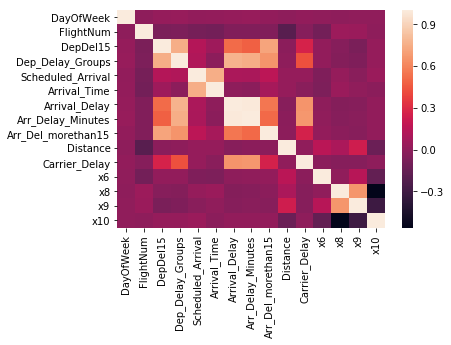

In [15]:
sn.heatmap(x.corr())

In [16]:
x.head(5)

,DayOfWeek,FlightNum,DepDel15,Dep_Delay_Groups,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Arr_Del_morethan15,Distance,Carrier_Delay,x6,x8,x9,x10
0,5,1,0,-1,711,707,-4,0,0,187,0,470,1,1,6
1,6,1,0,-1,711,703,-8,0,0,187,0,461,1,1,6
2,1,1,0,0,711,706,-5,0,0,187,0,462,1,1,6
3,2,1,0,-1,711,709,-2,0,0,187,0,467,1,1,6
4,3,1,0,-1,711,659,-12,0,0,187,0,476,1,1,6


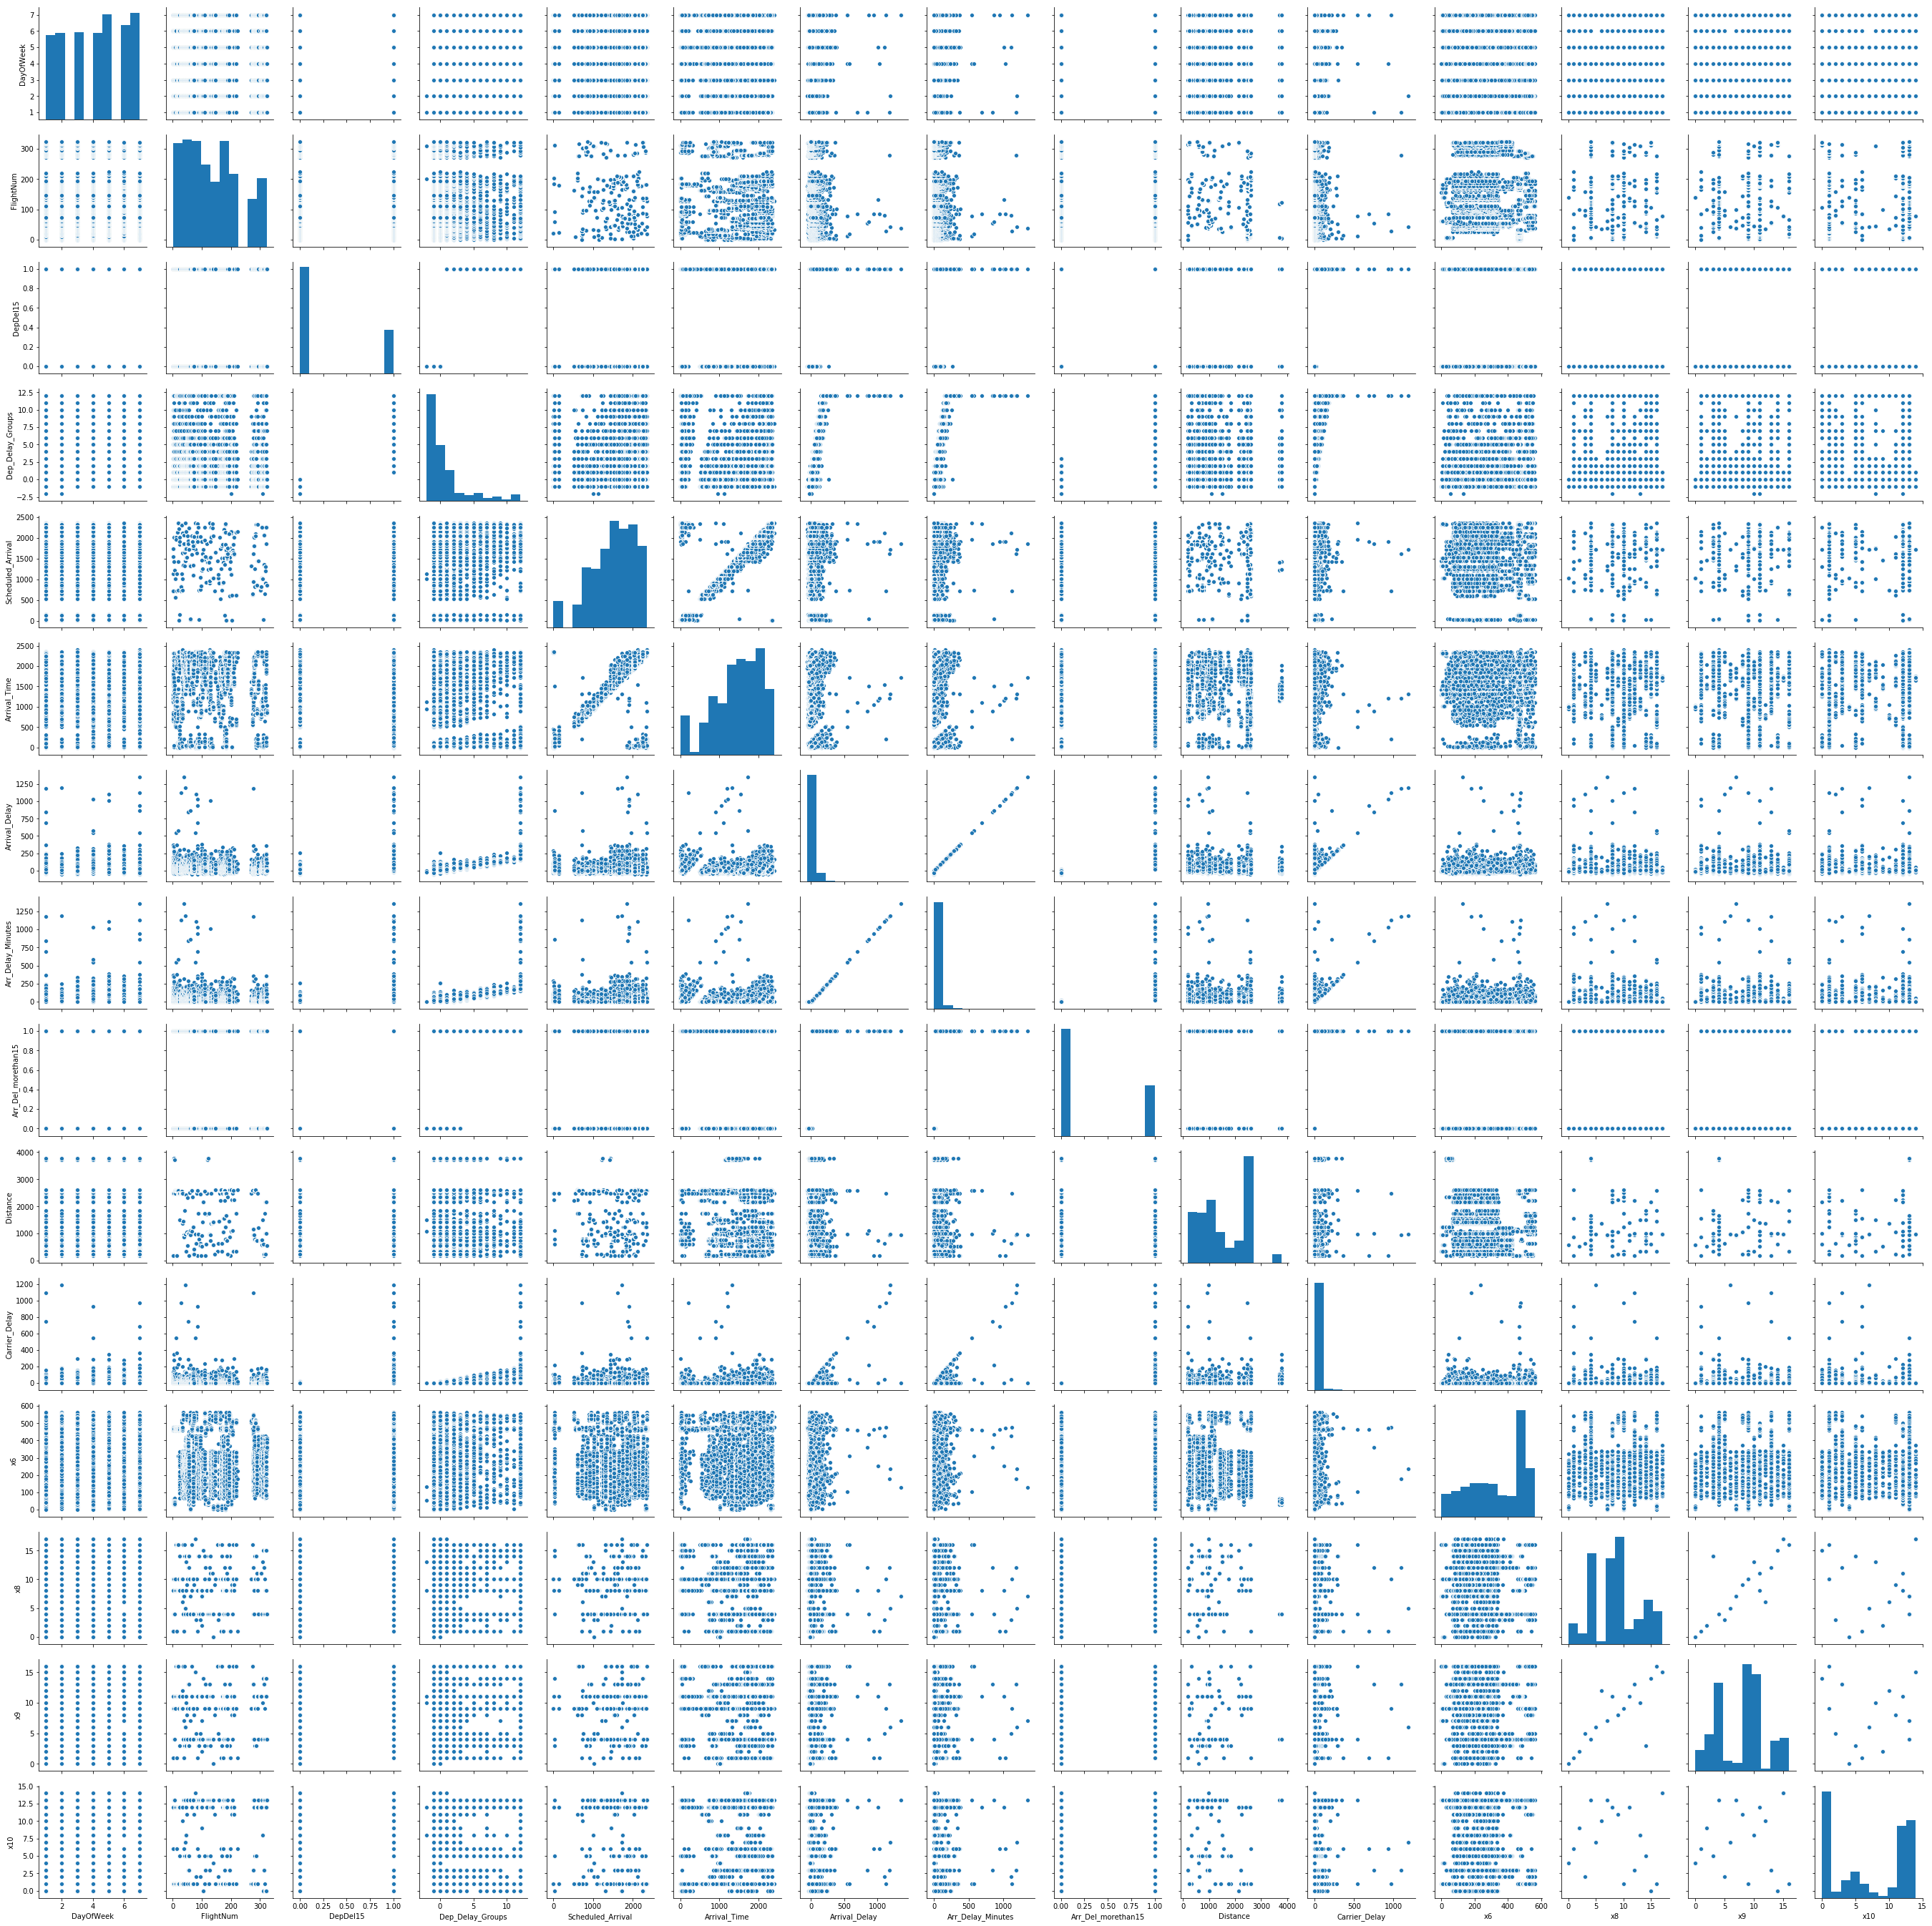

In [17]:
sn.pairplot(x)

In [18]:
y.head(3)

0   -6
1   -6
2    1
Name: Dep_Delay, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1060)

In [22]:
project=LinearRegression()
project.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred=project.predict(x_test)

In [24]:
# Final Prediction

In [25]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9903134885693103

In [26]:
import matplotlib.pyplot as pt

Text(0.5, 0, 'y_test')

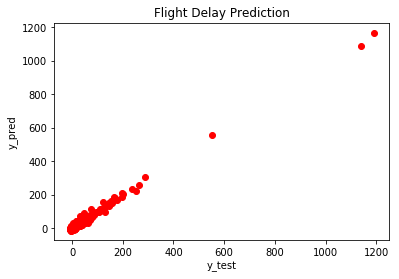

In [27]:
pt.scatter(y_test,y_pred,color='Red')
pt.title("Flight Delay Prediction")
pt.ylabel("y_pred")
pt.xlabel("y_test")

Text(0.5, 1.0, 'Prediction Plot')

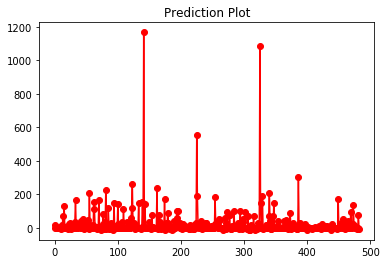

In [28]:
# Prediction Plot
pt.plot(y_pred,'r-o')
pt.title("Prediction Plot")

In [29]:
%matplotlib inline

Text(0.5, 1.0, 'Actual Data vs Predicted Data')

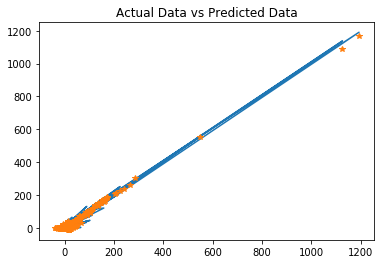

In [31]:
pt.plot(x_test['Arrival_Delay'],y_test,'-', x_test['Arrival_Delay'],y_pred,'*')
pt.title("Actual Data vs Predicted Data")

In [19]:
score=[]
for i in range(2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression().fit(x_train,y_train)
    score.append(lr.score(x_test,y_test))
I=score.index(np.max(score)) 

In [20]:
I

1060